In [23]:
# Importieren alle benötigte Libraries.

import numpy as np
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
# Einlesen des Datensatzes mit Messung der Zeit in Milisekunden.

start_time = time.time()

salaries_data = pd.read_csv('jobs_in_data_2024.csv')

end_time = time.time()

elapsed_time = (end_time - start_time) * 1000

print(f"Es wurden {elapsed_time} Milisekunden benötigt, um den Datensatz einzulesen.")

Es wurden 20.180225372314453 Milisekunden benötigt, um den Datensatz einzulesen.


In [25]:
# Anzeigen der Anzahl der Zeilen und Spalten

num_rows, num_columns = salaries_data.shape

print(f"Der Datensatz hat {num_rows} Zeilen und {num_columns} Spalten.")

Der Datensatz hat 14199 Zeilen und 12 Spalten.


In [26]:
# ----------------------------------------------------------------------------------------
# Visualisierungen Salaries_by_job_title

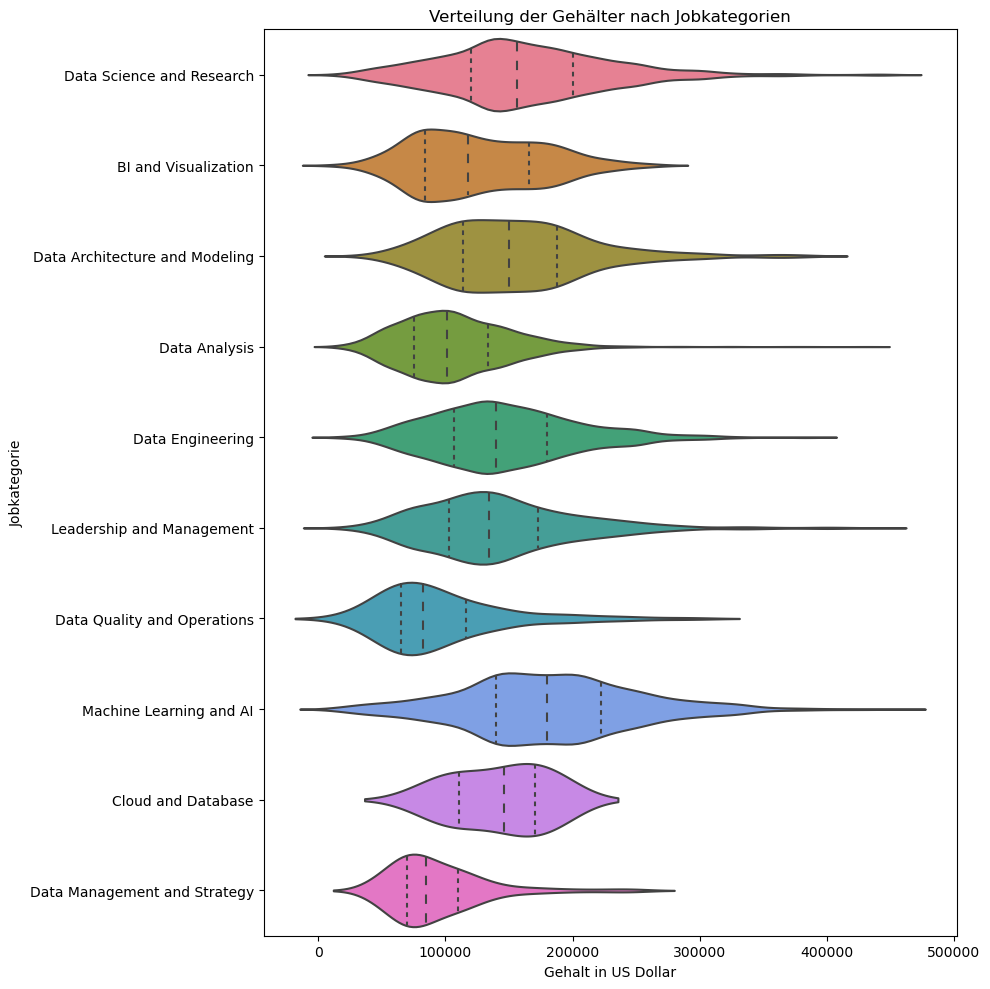

In [27]:
# Violin Plot erstellen

plt.figure(figsize=(10, 10))  # Größe des Diagramms festlegen
sns.violinplot(x='salary_in_usd', y='job_category', data=salaries_data, scale='width', palette='husl', inner='quartile')  # Violin Plot erstellen

plt.xlabel('Gehalt in US Dollar')  # x-Achsenbeschriftung
plt.ylabel('Jobkategorie')  # y-Achsenbeschriftung
plt.title('Verteilung der Gehälter nach Jobkategorien')  # Diagrammtitel
plt.tight_layout()  # Layout optimieren
plt.show()  # Diagramm anzeigen

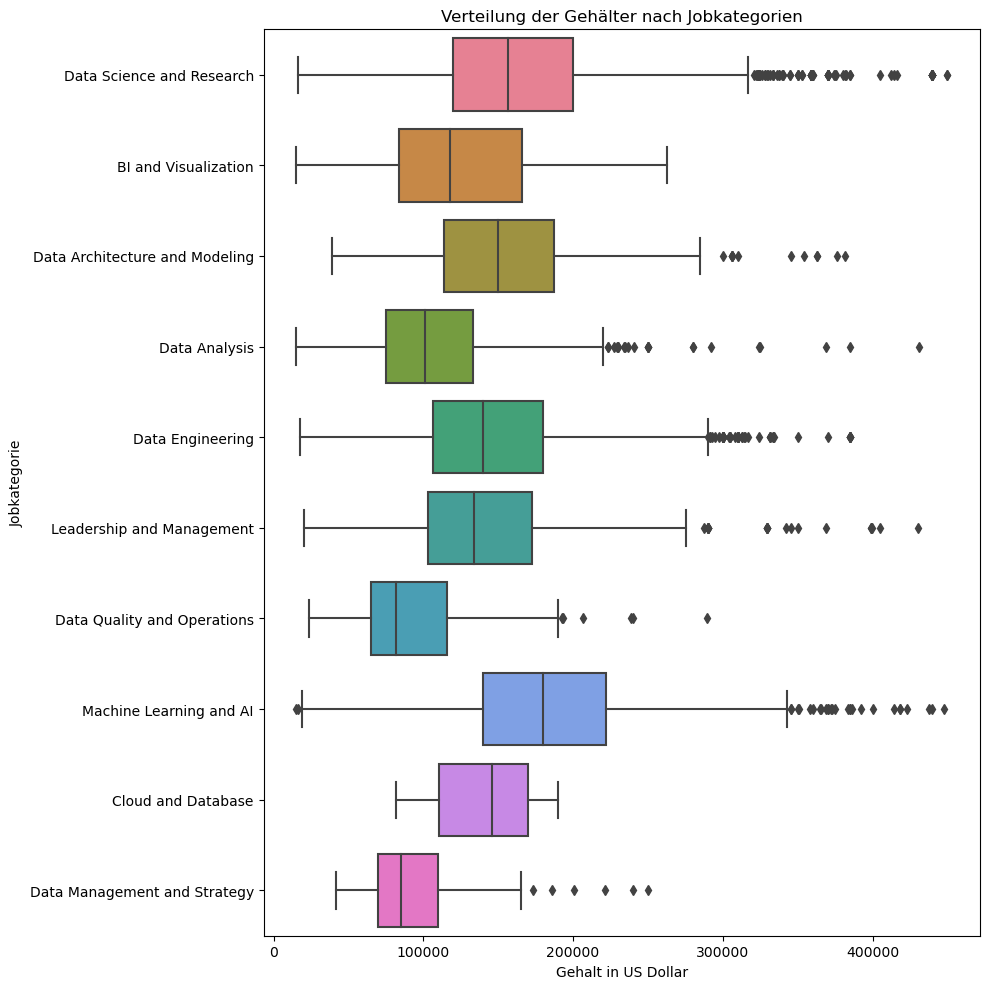

In [28]:
# Box Plot erstellen

plt.figure(figsize=(10, 10))  # Größe des Diagramms festlegen
sns.boxplot(x='salary_in_usd', y='job_category', data=salaries_data, palette='husl')  # Box Plot erstellen

plt.xlabel('Gehalt in US Dollar')  # x-Achsenbeschriftung
plt.ylabel('Jobkategorie')  # y-Achsenbeschriftung
plt.title('Verteilung der Gehälter nach Jobkategorien')  # Diagrammtitel
plt.tight_layout()  # Layout optimieren
plt.show()  # Diagramm anzeigen

In [29]:
## Data Cleaning:

In [30]:
null_daten_count = salaries_data.isnull().sum()
null_stellen_count = null_daten_count.sum()
daten_stellen_Insg = salaries_data.shape[0]*salaries_data.shape[1]
prozent_fehlend = round(100 * null_stellen_count / daten_stellen_Insg, 2)
print("Insgesamt fehlen " + str(null_stellen_count) + " von " + str(daten_stellen_Insg) + " (" + str(prozent_fehlend) + "%) Daten")
print("Pro Spalte fehlen: ")
print(null_daten_count)

Insgesamt fehlen 0 von 170388 (0.0%) Daten
Pro Spalte fehlen: 
work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
work_setting          0
company_location      0
company_size          0
job_category          0
dtype: int64


In [31]:
print(salaries_data.dtypes)

work_year              int64
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
work_setting          object
company_location      object
company_size          object
job_category          object
dtype: object


In [32]:
# ----------------------------------------------------------------------------------------
# Visualisierungen Wie steht die Firmengröße in Relation zum Gehalt?

In [33]:
# Datengruppierung

gehalt_durchschnitt = salaries_data.groupby('company_size')['salary_in_usd'].median().reset_index()

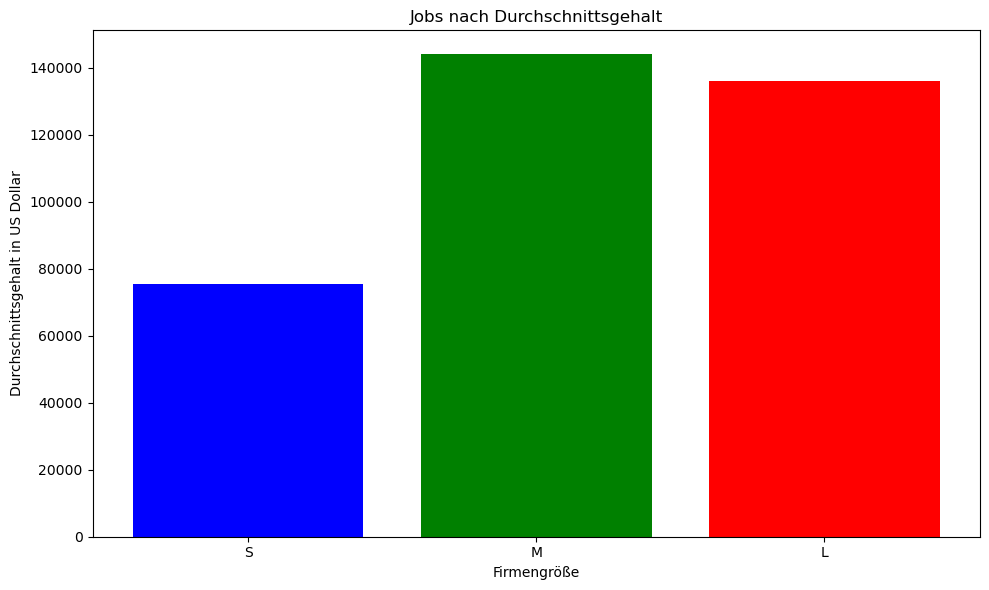

In [34]:
# Balkendiagramm erstellen
colors = ['blue', 'green', 'red'] #Farbenpallette erstellen

plt.figure(figsize=(10, 6))  # Größe des Diagramms festlegen
plt.bar(gehalt_durchschnitt['company_size'][::-1], gehalt_durchschnitt['salary_in_usd'][::-1], color=colors)  # Balkendiagramm erstellen
plt.xlabel('Firmengröße')  # x-Achsenbeschriftung
plt.ylabel('Durchschnittsgehalt in US Dollar')  # y-Achsenbeschriftung
plt.title('Jobs nach Durchschnittsgehalt')  # Diagrammtitel
plt.tight_layout()  # Layout optimieren
plt.show()  # Diagramm anzeigen

In [35]:
# ----------------------------------------------------------------------------------------
# Visualisierungen Verteilung der durchschnittlichen Gehälter nach Unternehmensstandort

In [36]:
import geopandas as gpd

salary_data = salaries_data

unique_countries_data = salary_data['company_location'].unique()
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
unique_countries_map = world['name'].unique()
for country in unique_countries_data:
    if country not in unique_countries_map:
        print(f" {country}")

 United States
 Türkiye
 Bosnia and Herzegovina
 American Samoa
 Malta
 Viet Nam
 Gibraltar
 Mauritius
 Russian Federation
 Korea, Republic of
 Andorra
 Central African Republic
 Singapore
 Iran, Islamic Republic of
 Moldova, Republic of


C:\Users\User\AppData\Local\Temp\ipykernel_24644\828215208.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [37]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
unique_countries = sorted(world['name'].unique())
for country in unique_countries:
    print(country)

Afghanistan
Albania
Algeria
Angola
Antarctica
Argentina
Armenia
Australia
Austria
Azerbaijan
Bahamas
Bangladesh
Belarus
Belgium
Belize
Benin
Bhutan
Bolivia
Bosnia and Herz.
Botswana
Brazil
Brunei
Bulgaria
Burkina Faso
Burundi
Cambodia
Cameroon
Canada
Central African Rep.
Chad
Chile
China
Colombia
Congo
Costa Rica
Croatia
Cuba
Cyprus
Czechia
Côte d'Ivoire
Dem. Rep. Congo
Denmark
Djibouti
Dominican Rep.
Ecuador
Egypt
El Salvador
Eq. Guinea
Eritrea
Estonia
Ethiopia
Falkland Is.
Fiji
Finland
Fr. S. Antarctic Lands
France
Gabon
Gambia
Georgia
Germany
Ghana
Greece
Greenland
Guatemala
Guinea
Guinea-Bissau
Guyana
Haiti
Honduras
Hungary
Iceland
India
Indonesia
Iran
Iraq
Ireland
Israel
Italy
Jamaica
Japan
Jordan
Kazakhstan
Kenya
Kosovo
Kuwait
Kyrgyzstan
Laos
Latvia
Lebanon
Lesotho
Liberia
Libya
Lithuania
Luxembourg
Madagascar
Malawi
Malaysia
Mali
Mauritania
Mexico
Moldova
Mongolia
Montenegro
Morocco
Mozambique
Myanmar
N. Cyprus
Namibia
Nepal
Netherlands
New Caledonia
New Zealand
Nicaragua
Niger


C:\Users\User\AppData\Local\Temp\ipykernel_24644\881393583.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


In [38]:
salary_data['company_location']=salary_data['company_location'].replace({
    'United States':'United States of America',
    'Türkiye':'Turkey',
    'Bosnia and Herzegovina':'Bosnia and Herz.',
    'Viet Nam':'Vietnam',
    'Russian Federation':'Russia',
    'Korea, Republic of':'South Korea',
    'Central African Republic':'Central African Rep.',
    'Iran, Islamic Republic of':'Iran',
    'Moldova, Republic of':'Moldova'
})

salaries_data.to_csv('salary_mean_data.csv', index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_24644\833589082.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


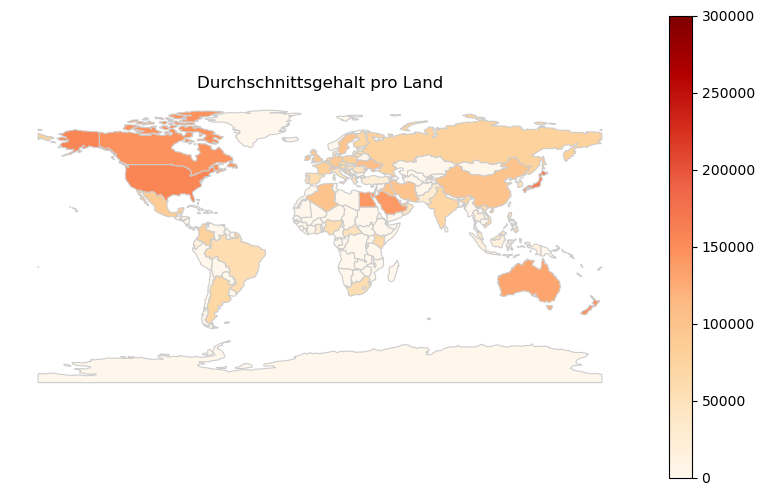

In [39]:
import matplotlib.pyplot as plt

mean_salary=salary_data.groupby('company_location')['salary_in_usd'].mean().reset_index()

world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world=world.merge(mean_salary, how='left',left_on='name',right_on='company_location')
world['salary_in_usd'].fillna(0,inplace=True)

fig, ax=plt.subplots(1,1,figsize=(10,6))
world.plot(column='salary_in_usd',cmap='OrRd',linewidth=0.8, ax=ax,edgecolor='0.8',legend=True)
ax.axis('off')
ax.set_title('Durchschnittsgehalt pro Land')
plt.show()

In [40]:
ausreis_loeschen=salary_data.index[salary_data['company_location']=='Qatar']
salary_data = salary_data.drop(ausreis_loeschen)
salary_data.to_csv('salary_mean_data.csv', index=False)

C:\Users\User\AppData\Local\Temp\ipykernel_24644\3406140109.py:3: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


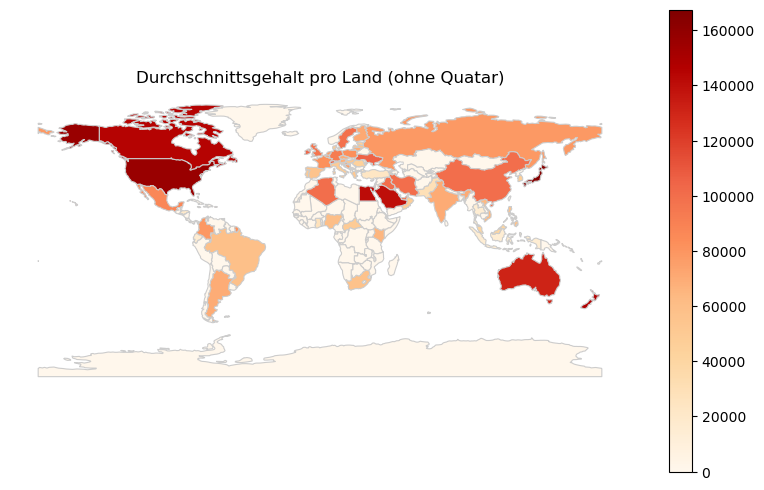

In [41]:
mean_salary=salary_data.groupby('company_location')['salary_in_usd'].mean().reset_index()

world=gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world=world.merge(mean_salary, how='left',left_on='name',right_on='company_location')
world['salary_in_usd'].fillna(0,inplace=True)

fig, ax=plt.subplots(1,1,figsize=(10,6))
world.plot(column='salary_in_usd',cmap='OrRd',linewidth=0.8, ax=ax,edgecolor='0.8',legend=True)
ax.axis('off')
ax.set_title('Durchschnittsgehalt pro Land (ohne Quatar)')
plt.show()

In [42]:
# ----------------------------------------------------------------------------------------
# Visualisierungen Gehälter nach Erfahrungslevel

In [43]:
import os
import time

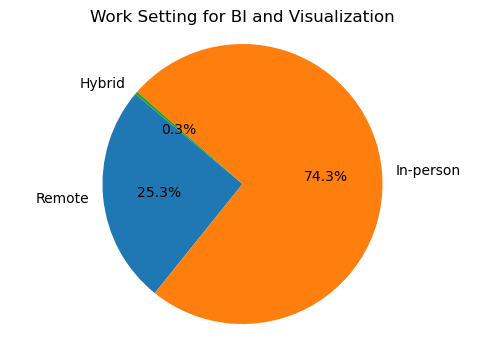

Elapsed time: 72.0367431640625 milliseconds


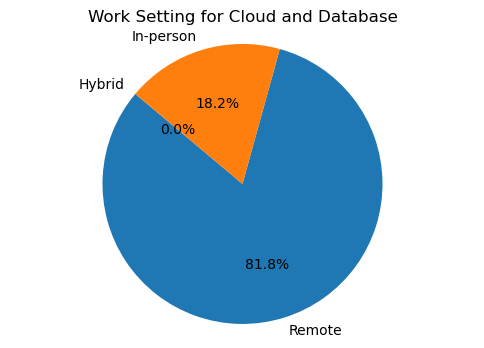

Elapsed time: 134.12714004516602 milliseconds


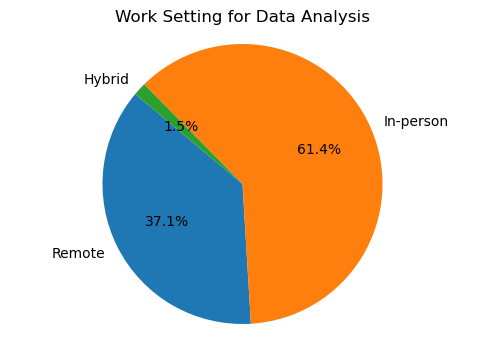

Elapsed time: 191.8165683746338 milliseconds


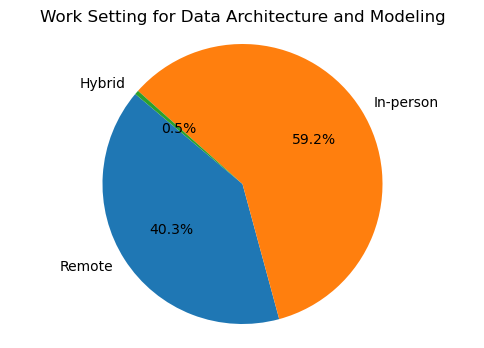

Elapsed time: 257.1253776550293 milliseconds


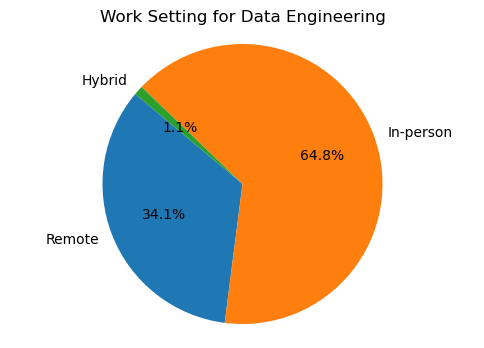

Elapsed time: 318.27402114868164 milliseconds


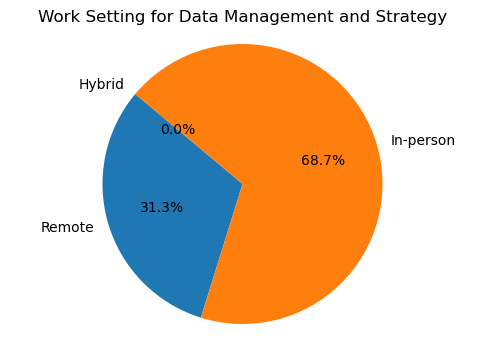

Elapsed time: 374.8495578765869 milliseconds


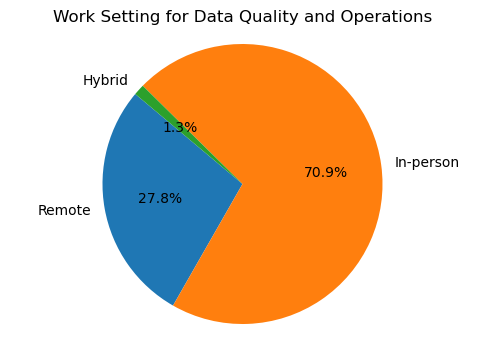

Elapsed time: 432.3689937591553 milliseconds


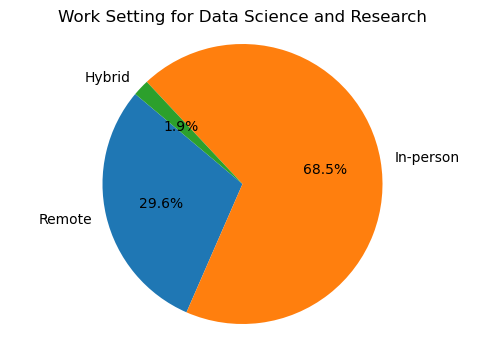

Elapsed time: 502.2876262664795 milliseconds


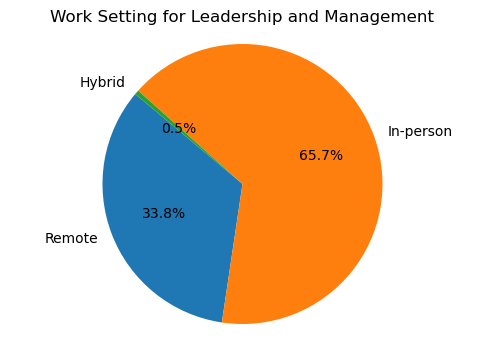

Elapsed time: 561.7036819458008 milliseconds


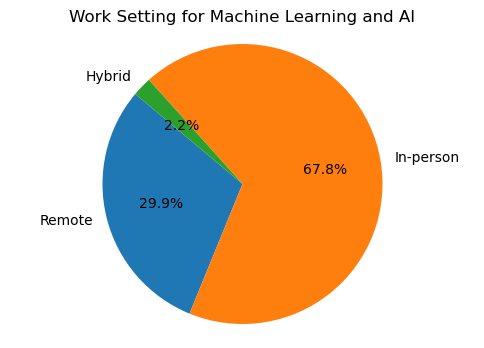

Elapsed time: 621.204137802124 milliseconds
Die angegebene Excel-Datei wurde nicht gefunden.


In [44]:
start_time = time.time()

df = salaries_data

all_categories = df['job_category'].unique()
all_settings = df['work_setting'].unique()
index = pd.MultiIndex.from_product([all_categories, all_settings], names=['job_category', 'work_setting'])
grouped = pd.DataFrame(0, index=index, columns=['count'])

counts = df.groupby(['job_category', 'work_setting']).size()

grouped.loc[counts.index, 'count'] = counts.values

job_categories = grouped.index.levels[0]
for category in job_categories:
    plt.figure(figsize=(6, 4))
    plt.title(f"Work Setting for {category}")
    data = grouped.loc[category]
    if data['count'].sum() > 0: 
        plt.pie(data['count'], labels=data.index, autopct='%1.1f%%', startangle=140)
        plt.axis('equal')  
        
        plt.show()
    else:
        print(f"No data available for {category}.")
    
    end_time = time.time()
    elapsed_time = (end_time - start_time) * 1000 
    print(f"Elapsed time: {elapsed_time} milliseconds")

else:
    print("Die angegebene Excel-Datei wurde nicht gefunden.")
